m_p = 1.930194526365569e-09, R_mu = 12.525162448534054


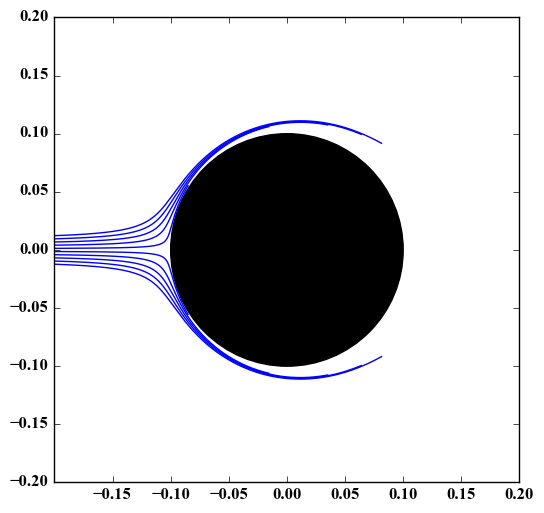

In [64]:
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import numpy as num
import matplotlib.ticker as tck

# Constants
r_p=8e-5
rho_p=900
u_p0=0.8
k_c=20
mu=1.511e-5
u_0=0.8
R=0.1
x_p0=-0.4
y_p0Min=-0.01
y_p0Max=0.01

# Functions
class Functions:
    def m(V, rho):
        return V*rho

    def R_mu(k_c, r_p, mu, m_p):
        return k_c*r_p*mu/m_p

    def VSphere(r):
        return 4./3*num.pi*r**3
    
    def u(x, y):
        return -u_0*(R**2*(x**2-y**2)-(x**2+y**2)**2)/(x**2+y**2)**2

    def v(x, y):
        return -2*R**2*u_0*x*y/(x**2+y**2)**2
    
    def x_p1(x_p0, u_0, dt):
        return x_p0+u_0*dt
    
    def y_p1(y_p0, v_0, dt):
        return y_p0+0
    
    def x_pNext(x_pPrev, x_pCurr, y_pCurr, dt, R_mu):
        return x_pCurr*(2-R_mu*dt)+(R_mu*dt-1)*x_pPrev+R_mu*dt**2*Functions.u(x_pCurr, y_pCurr)
    
    def y_pNext(y_pPrev, x_pCurr, y_pCurr, dt, R_mu):
        return y_pCurr*(2-R_mu*dt)+(R_mu*dt-1)*y_pPrev+R_mu*dt**2*Functions.v(x_pCurr, y_pCurr)
    
# Task
class Task:
    def calcTrajectory(y_p0, R_mu, dt, N, u_0):
        # first step
        x_pPrev=x_p0
        y_pPrev=y_p0
        x_pCurr=Functions.x_p1(x_pPrev, u_0, dt)
        y_pCurr=Functions.y_p1(y_pPrev, 0, dt)
        x_pArr=[x_pPrev, x_pCurr]
        y_pArr=[y_pPrev, y_pCurr]
        i=0
        # next steps
        while i<N:
            x_pNext=Functions.x_pNext(x_pPrev, x_pCurr, y_pCurr, dt, R_mu)
            y_pNext=Functions.y_pNext(y_pPrev, x_pCurr, y_pCurr, dt, R_mu)
            x_pArr.append(x_pNext)
            y_pArr.append(y_pNext)
            x_pPrev=x_pCurr
            y_pPrev=y_pCurr
            x_pCurr=x_pNext
            y_pCurr=y_pNext
            i=i+1
        return [x_pArr, y_pArr]
    
    def calc():
        Ny = 10
        m_p=Functions.VSphere(r_p)*rho_p
        R_mu=Functions.R_mu(k_c, r_p, mu, m_p)
        print("m_p = {0}, R_mu = {1}".format(m_p, R_mu))
        y_p0Arr = num.linspace(y_p0Min,y_p0Max,Ny)
        dt = 1e-3
        N = 7000
        return list(map(lambda y_p0: Task.calcTrajectory(y_p0,R_mu,dt, N, u_0), y_p0Arr))
    
    def start():
        trajectories = Task.calc()       
        
        plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams["font.size"] = 12
        plt.rcParams["font.style"] = "normal"
        
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_autoscaley_on(False)
        ax.set_autoscalex_on(False)
        ax.set_ylim([-2*R, 2*R])
        ax.set_xlim([-2*R, 2*R])
        for trajectory in trajectories:
            plt.plot(trajectory[0], trajectory[1], color='blue')
        xticks = ax.xaxis.get_major_ticks()
        xticks[0].label1.set_visible(False)
        circle = plt.Circle((0, 0), R, color='black')
        ax.add_artist(circle)
        plt.show()   
        
# Program
Task.start()